<a href="https://colab.research.google.com/github/Bemmanuel01/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Price Prediction Project using TensorFlow**

This project utilizes TensorFlow for stock market price analysis, which is approached as a time series problem. To address this, we employ a Recurrent Neural Network (RNN), a model well-suited for sequential data like stock prices. TensorFlow, an open-source Python framework, is widely recognized for its capabilities in both deep learning and machine learning. It simplifies the process of building neural networks, allowing us to implement complex models with just a few lines of code.

**Let's Login**

**Import dependencies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

- Reading and exploring the dataset

In [2]:
stock = pd.read_csv('stock_price.csv')

In [4]:
stock.head(7)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL


In [5]:
stock.shape

(619040, 7)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


*Convering the date feature to a DateTime* data type;

In [9]:
stock['date'] = pd.to_datetime(stock['date'])

In [10]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [11]:
stock.isnull().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


In [12]:
stock.describe()

,date,open,high,low,close,volume
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443264,83.023334,83.778311,82.256096,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06


**Exploratory Data Analysis (EDA)**

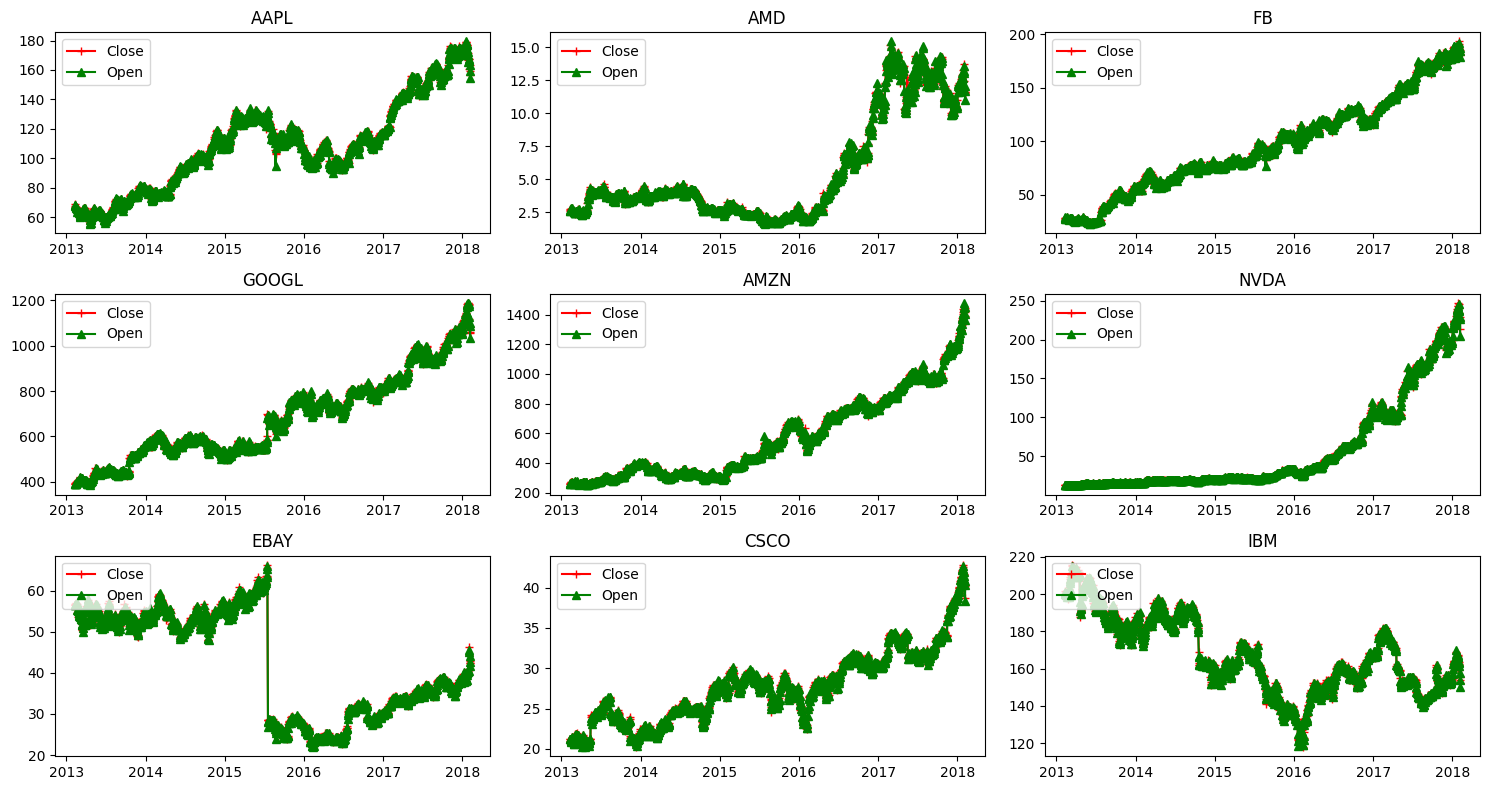

In [13]:
# Expressing the 'date' column to datetime format
stock['date'] = pd.to_datetime(stock['date'])

# list of companies to visualize
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))

# Loop through each company and create a subplot
for index, company in enumerate(companies, start=1):
    plt.subplot(3, 3, index)
    company_data = stock[stock['Name'] == company]

    # The closing price in red
    plt.plot(company_data['date'], company_data['close'], color="r", label="Close", marker="+")

    # The opening price in green
    plt.plot(company_data['date'], company_data['open'], color="g", label="Open", marker="^")
    plt.title(company)
    plt.legend(loc="upper left")
    plt.tight_layout()
plt.show()

- Visualizing Each Company's Volume

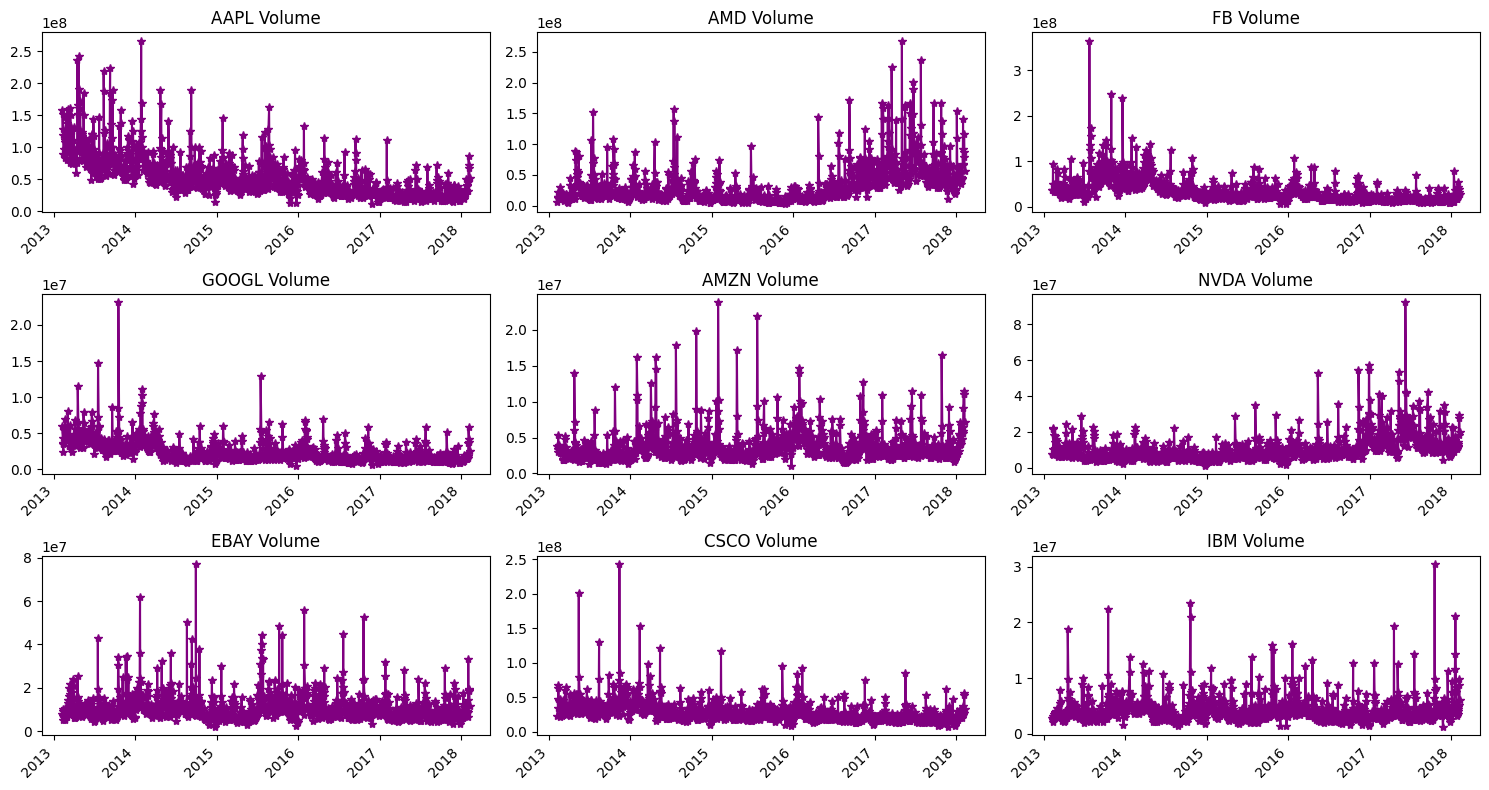

In [14]:
plt.figure(figsize=(15, 8))

for index, company in enumerate(companies, start=1):
    plt.subplot(3, 3, index)
    company_data = stock[stock['Name'] == company]

    plt.plot(company_data['date'], company_data['volume'], color='purple', marker='*', linestyle='-', markersize=6)
    plt.title(f"{company} Volume")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

*- Analizing data for Apple Stocks from 2013 to 2018.*

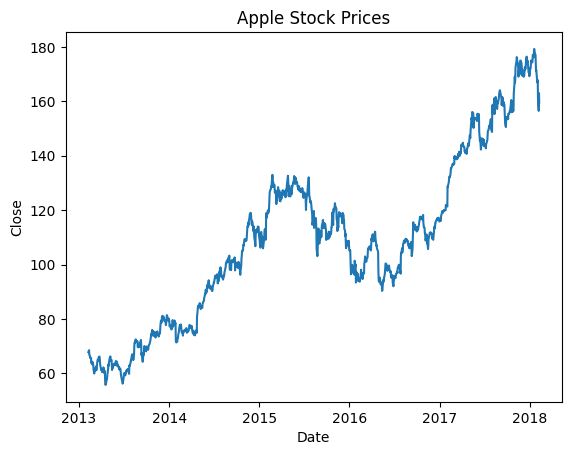

In [15]:
apple = stock[stock['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1)) & (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

- Splitting the data into training and validation sets due to the nature of time series forecasting, where it is essential to evaluate the model's performance on unseen data in a sequential manner.

In [16]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


- Data Preprocessing and Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler to scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Splitting the scaled data into training data
train_data = scaled_data[:int(training), :]

x_train, y_train = [], []

# Use a rolling window of 60 time steps for features and the next value as the target
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Converting lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input data for LSTM model (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

- MinMaxScaler: Scales the stock prices to be between 0 and 1, ensuring that the LSTM model can effectively learn the relationships between the features.
- Sliding Window: Uses a window of 60 time steps as input features (x_train) and the next time step as the target (y_train).
- Reshaping: Reshapes the feature set to the shape expected by an LSTM network, which requires a 3D input: (samples, timesteps, features).

**Building a Gated RNN - LSTM Network Using TensorFlow**:

Building an LSTM network using TensorFlow, which is effective for sequence modeling and time series analysis. LSTMs are used to avoid the vanishing gradient problem common in traditional RNNs.

When stacking multiple LSTM layers in TensorFlow, we set return_sequences=True for all layers except the final one, ensuring that each layer processes the full sequence of data.

For time series data, the output layer has a single node with no activation function to predict continuous values, such as stock prices, without limiting the output range.

In [19]:
model = keras.models.Sequential()

In [20]:
model.add(keras.layers.LSTM(units=64, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

**Model Compilation and Training**

The following parameters are essential when compiling a model:

- Optimizer: This method optimizes the cost function using techniques like gradient descent, adjusting the model’s weights during training.
- Loss: The loss function measures how well the model is performing, providing feedback on whether the model is improving as training progresses.
- Metrics: These are used to evaluate the model’s performance, allowing us to track how well the model predicts both the training and validation data.

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model with additional metrics
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])
# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with validation data and early stopping
history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0047 - mean_absolute_error: 0.0514 - mean_squared_error: 0.0047 - val_loss: 0.0182 - val_mean_absolute_error: 0.1315 - val_mean_squared_error: 0.0182
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0041 - mean_absolute_error: 0.0483 - mean_squared_error: 0.0041 - val_loss: 0.0014 - val_mean_absolute_error: 0.0296 - val_mean_squared_error: 0.0014
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0044 - mean_absolute_error: 0.0480 - mean_squared_error: 0.0044 - val_loss: 0.0073 - val_mean_absolute_error: 0.0808 - val_mean_squared_error: 0.0073
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0033 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0033 - val_loss: 9.4843e-04 - val_mean_absolute_error: 0.0233 - val_mean_squared_error: 9.4843e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0032 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0032 - val_loss: 0.0023 - v

- The best performance occurs at Epoch 12, with a validation loss of 0.0012, validation MAE of 0.0290, and validation MSE of 0.0012. These metrics indicate that the model is making accurate predictions on the validation data at this point in training.

Hence testing the performance of the model based on the results of the training and validation;

In [26]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step
MSE 22.023299855347496
RMSE 4.692898875465728


Vizualizing the final results;

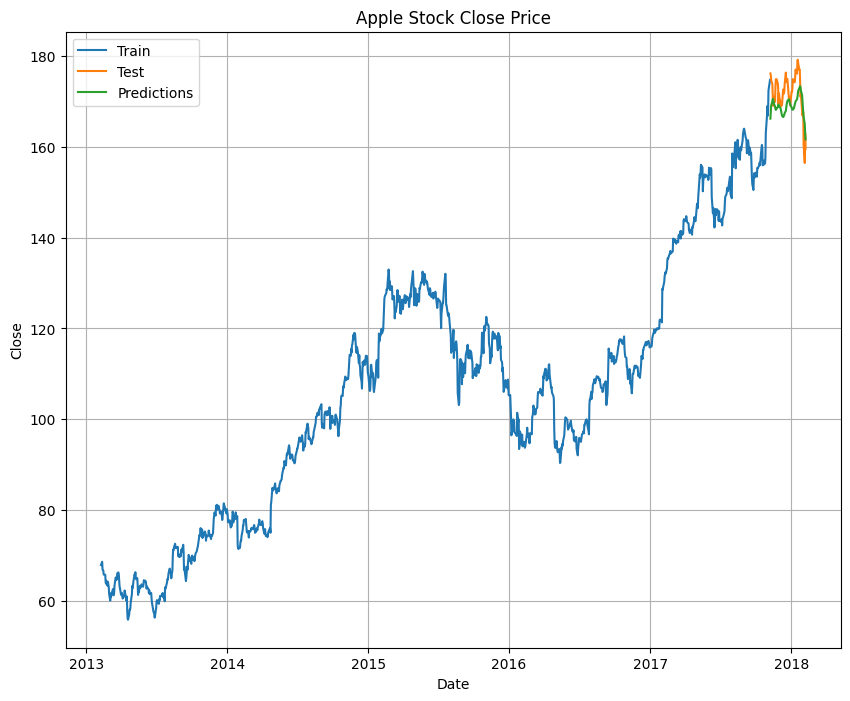

In [28]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.grid(True)

**Summary of Interpretation:**

The model shows a lag in predicting stock prices, consistently underestimating short-term fluctuations before eventually aligning with actual values. This suggests the model is slow to react to immediate market changes. Thus, to further improve performance, adding more relevant features, refining the model architecture (e.g., deeper LSTMs or GRUs), and fine-tuning parameters to better capture both short-term dynamics and long-term trends.






